In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import random
import copy 
import math

In [36]:
d_train = pd.read_csv("Classification_train.csv")

In [37]:
X = d_train[list(d_train.columns.values)].drop(['label'], axis=1).to_numpy().reshape(30000,784)
Y = d_train[['label']].to_numpy().reshape(30000)

In [38]:
def one_hot_encode(labels, num_classes):
    num_samples = len(labels)
    
    # Create an array filled with zeros
    one_hot_encoded = np.zeros((num_samples, num_classes), dtype=int)
    
    # Set the corresponding element to 1 for each sample
    one_hot_encoded[np.arange(num_samples), labels] = 1
    
    return one_hot_encoded

num_classes = 10

Y = one_hot_encode(Y, num_classes)
'''print("Original Labels:")
print(Y)
print("\nOne-Hot Encoded Labels:")
print(Y)'''


'print("Original Labels:")\nprint(Y)\nprint("\nOne-Hot Encoded Labels:")\nprint(Y)'

In [39]:
X = X.T
Y = Y.T

In [40]:
x_train = X[:,:21000]
y_train = Y[:,:21000]
x_test = X[:,21000:]
y_test = Y[:,21000:]

<function matplotlib.pyplot.show(close=None, block=None)>

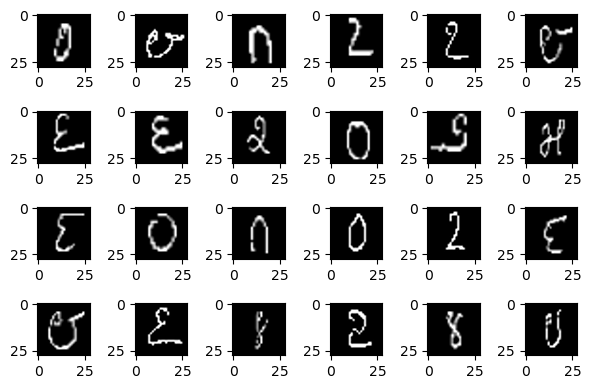

In [72]:
fig,ax=plt.subplots(4,6,figsize=(6,4))
num=0
for i in range(4):
  for j in range(6):
    ax[i][j].imshow(x_train.T[num].reshape(28,28),interpolation='spline16', cmap = 'gray')
    num+=1
plt.tight_layout()
plt.show

In [ ]:
def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)

In [43]:
def derivative_relu(x):
    return np.array(x > 0, dtype = np.float64)

# def relu_prime(x):
#     return np.array(x > 0, dtype=np.float64)

In [44]:
def initialize_parameters(layer_sizes):
    parameters = {}
    for i in range(1, len(layer_sizes)):
        parameters[f'W{i}'] = np.random.randn(layer_sizes[i], layer_sizes[i-1]) * 0.01
        parameters[f'b{i}'] = np.zeros((layer_sizes[i], 1))
    return parameters

In [45]:
def forward_propagation(x, parameters):
    forward_caches = {'A0': x} 
    for i in range(1, len(parameters) // 2 + 1):
        W, b = parameters[f'W{i}'], parameters[f'b{i}']
        Z = np.dot(W, forward_caches[f'A{i-1}']) + b
        A = relu(Z) if i < len(parameters) // 2 else softmax(Z)
        forward_caches[f'Z{i}'], forward_caches[f'A{i}'] = Z, A
    return A, forward_caches

In [46]:
def compute_cost(forward_caches, y, parameters):
    y_pred = forward_caches[f'A{(len(parameters)//2)}']
    m = y.shape[1]
    cost = -(1/m)*np.sum(y*np.log(y_pred))
    return cost

In [47]:
def backward_propagation(y, parameters, forward_caches):
    m = y.shape[1]
    gradients = {}
    AL = forward_caches[f'A{len(parameters) // 2}']
    dAL = - (np.divide(y, AL) - np.divide(1 - y, 1 - AL))

    # Corrected calculation for the output layer
    dZ_out = AL - y
    dW_out = (1/m) * np.dot(dZ_out, forward_caches[f'A{len(parameters) // 2 - 1}'].T)
    db_out = (1/m) * np.sum(dZ_out, axis=1, keepdims=True)

    gradients[f'dW{len(parameters) // 2}'] = dW_out
    gradients[f'db{len(parameters) // 2}'] = db_out

    dAL = np.dot(parameters[f'W{len(parameters) // 2}'].T, dZ_out)

    for i in range(len(parameters) // 2 - 1, 0, -1):
        Z, A_prev = forward_caches[f'Z{i}'], forward_caches[f'A{i-1}']
        W = parameters[f'W{i}']

        dZ = np.multiply(dAL, derivative_relu(Z))
        dW = np.dot(dZ, A_prev.T) / m
        db = np.sum(dZ, axis=1, keepdims=True) / m
        dA_prev = np.dot(W.T, dZ)

        gradients[f'dW{i}'] = dW
        gradients[f'db{i}'] = db
        dAL = dA_prev

    return gradients

In [48]:
def update_parameters(parameters, gradients, learning_rate):
    for i in range(1, len(parameters) // 2 + 1):
        parameters[f'W{i}'] -= learning_rate * gradients[f'dW{i}']
        parameters[f'b{i}'] -= learning_rate * gradients[f'db{i}']
    return parameters

In [49]:
def train_neural_network(x_train, y_train, layer_sizes, learning_rate, num_epochs):
    parameters = initialize_parameters(layer_sizes)
    j = []
    for i in range(num_epochs):
        # Forward propagation
        AL, forward_caches = forward_propagation(x_train, parameters)

        # Compute cost (cross-entropy loss)
        cost = compute_cost(forward_caches, y_train, parameters)
        
        # Backward propagation
        gradients = backward_propagation(y_train, parameters, forward_caches)

        # Update parameters
        parameters = update_parameters(parameters, gradients, learning_rate)

        # Print cost for monitoring training progress
        if i % 100 == 0:
            print("Cost after", i, "iterations is :", cost)
        j.append(cost)
    return parameters, j

In [52]:
iterations = 500
learning_rate = 0.001
layer_sizes = [784, 1000, 10]
Parameters, Cost_list = train_neural_network(x_train, y_train,  layer_sizes = layer_sizes, learning_rate = learning_rate, num_epochs= iterations)

Cost after 0 iterations is : 7.5116113331478
Cost after 100 iterations is : 0.13955002861616253
Cost after 200 iterations is : 0.08573034354593875
Cost after 300 iterations is : 0.061589631748754196
Cost after 400 iterations is : 0.04755409033317368


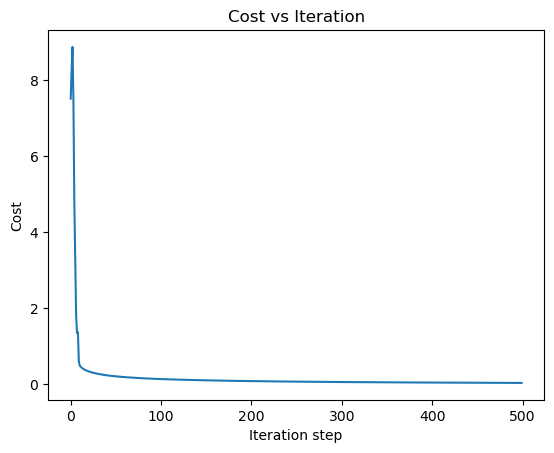

In [63]:
t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.title("Cost vs Iteration")
plt.xlabel("Iteration step")
plt.ylabel("Cost")
plt.show()

In [54]:
def accuracy(inp, labels, parameters):
    a, forward_cache = forward_propagation(inp, parameters)
    a_out = forward_cache[f'A{len(Parameters)//2}'] 
    a_out = np.argmax(a_out, 0)  
    labels = np.argmax(labels, 0)
    acc = np.mean(a_out == labels)*100
    return acc

In [55]:
def y_hat(x, labels, parameters):
    a, forward_cache = forward_propagation(x, parameters)
    y_pred = forward_cache[f'A{(len(parameters)//2)}']
    return y_pred


In [64]:
y_pred = y_hat(x_test, y_test, Parameters)
y_pred = np.argmax(y_pred, 0)
y_test_normal = np.argmax(y_test, 0)

In [65]:
acc = accuracy(x_test, y_test, Parameters)

In [66]:
print("Accuracy of Train Dataset", accuracy(x_train, y_train, Parameters), "%")
print("Accuracy of Test Dataset", round(accuracy(x_test, y_test, Parameters)), "%")

Accuracy of Train Dataset 99.2 %
Accuracy of Test Dataset 97 %


In [59]:
def confusion_matrix(y_true, y_pred, num_classes):
    # Initialize the confusion matrix with zeros
    conf_matrix = np.zeros((num_classes, num_classes), dtype=int)

    # Flatten the 2D arrays
    y_true_flat = y_true.flatten()
    y_pred_flat = y_pred.flatten()

    # Calculate the confusion matrix
    for true_label, pred_label in zip(y_true_flat, y_pred_flat):
        conf_matrix[true_label, pred_label] += 1

    return conf_matrix

In [68]:
y_test_normal, y_pred

(array([4, 8, 9, ..., 9, 3, 9], dtype=int64),
 array([4, 8, 9, ..., 9, 3, 9], dtype=int64))

In [69]:
matric = confusion_matrix(y_test_normal, y_pred, 10)
matric

array([[852,  23,   2,   1,   1,   0,   0,   3,   1,   1],
       [  8, 904,   0,   1,   0,   0,   1,   1,   0,   1],
       [  5,   0, 891,   4,   0,   0,   0,   0,   0,   0],
       [  6,   0,   0, 862,   6,   6,   4,  10,   0,   1],
       [  2,   0,   0,   7, 905,   9,   1,   1,   1,   2],
       [  0,   3,   2,   4,   7, 910,   1,   0,   2,   1],
       [  1,   0,   2,   4,   0,   0, 884,  18,   0,   7],
       [  1,   2,   0,  12,   0,   0,  27, 817,   0,   1],
       [  8,   0,   1,   1,   0,   0,   0,   0, 851,   3],
       [  1,   0,   0,   4,   6,   2,   8,   0,   3, 883]])

Test Data

In [83]:
d_test = pd.read_csv("Classification_test.csv")
X_test_g = d_test[d_test.columns.values]
X_test_g = X_test_g.drop(['ID'], axis=1)
X_test_g = X_test_g.to_numpy().T

<function matplotlib.pyplot.show(close=None, block=None)>

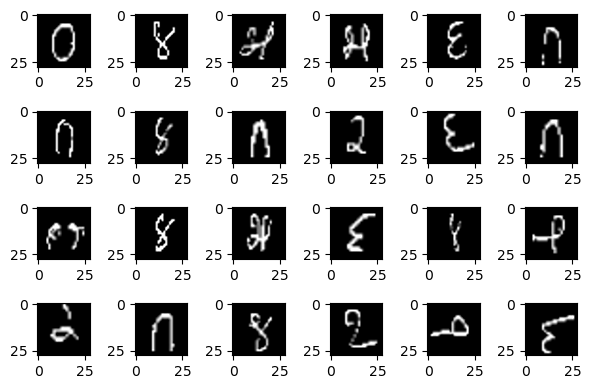

In [85]:
fig,ax=plt.subplots(4,6,figsize=(6,4))
num=0
for i in range(4):
  for j in range(6):
    ax[i][j].imshow(X_test_g.T[num].reshape(28,28),interpolation='spline16', cmap = 'gray')
    num+=1
plt.tight_layout()
plt.show

In [86]:
prediction_tf = y_hat(X_test_g, y_test, Parameters)
prediction_tf = np.argmax(prediction_tf, 0)

In [87]:
prediction_tf

array([0, 4, 5, ..., 0, 8, 5], dtype=int64)